# Quick intro to `pandas`
### MCS 275 Spring 2021 - Emily Dumas

This is a quick tour of basic plotting with matplotlib.  For more detail see
* [Chapter 3 of VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/)

You can install pandas on your own machine (e.g. `python3 -m pip install pandas`).  It is also available on [Google Colab](https://colab.research.google.com/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [32]:
# Prettification options

# Nice colors
plt.style.use("Solarize_Light2")

# Big text options
params = {'axes.labelsize': 18,
           'axes.titlesize':32,
           'font.size': 20,
           'legend.fontsize': 20,
           'xtick.labelsize': 16,
           'ytick.labelsize': 16}

# Global params like default sizes live in mpl not plt
mpl.rcParams.update(params)

## Opening files

### Excel spreadsheet of animal data

In [49]:
df = pd.read_excel("data/animals.xlsx")
df

,common name,species,diet,population,lifespan
0,wolf,canis lupus,carnivore,300000.0,14
1,capybara,hydrochoerus hydrochaeris,herbivore,NaN,7
2,axolotl,ambystoma mexicanum,carnivore,950.0,15
3,raccoon,procyon lotor,omnivore,20000000.0,13


In [ ]:
# In columns of type float, pandas uses "NaN" (not a number)
# to indicate missing data.  In this case, the worldwide
# population of capybaras is not known.

### HTML table (UIC academic calendar)

In [52]:
# read_html takes a URL, string, or urllib response object
# and gives a list of DataFrames, one for each table in the
# document.
# Here, we ask for just the *first* table
# (corresponding to summer 2019)
pd.read_html(
    "https://catalog.uic.edu/ucat/academic-calendar/"
)[0]

,Date,Event
0,Summer Session 1,(4-Week Session)
1,"May 20, M",Instruction begins.
2,"May 22, W",Last day to complete late registration for Sum...
3,"May 27, M",Memorial Day holiday. No classes
4,"June 3, M",CampusCare Waiver deadline.
5,"June 5, W",Last day for undergraduate students to use opt...
6,"June 13, Th",Instruction ends for Summer Session 1.
7,"June 14, F",Final examinations for Summer Session 1.
8,Summer Session 2,(8-Week Session)
9,"June 17, M",Instruction begins.


### CSV of electrical energy consumption in Europe

This is the example we'll work with for the rest of lecture.

In [8]:
df = pd.read_csv(
    "data/europe-electricity/europe-electricity-2017-to-2019.csv",
    parse_dates=True,
    index_col="date" # refers to name in header row
)

In [10]:
type(df)
# DataFrame = table

pandas.core.frame.DataFrame

In [13]:
df["France"] # one column of the table

date
2017-01-01    69196.0
2017-01-02    74295.0
2017-01-03    78852.0
2017-01-04    79868.0
2017-01-05    78665.0
               ...   
2019-12-27    57274.0
2019-12-28    56276.0
2019-12-29    59341.0
2019-12-30    65543.0
2019-12-31    65994.0
Name: France, Length: 1095, dtype: float64

In [14]:
type(df["France"])
# Series = column

pandas.core.series.Series

In [15]:
pd.Timestamp("2018-04-28")

Timestamp('2018-04-28 00:00:00')

In [16]:
# DataFrame[column_name][index]
df["United Kingdom"][pd.Timestamp("2018-04-28")]

32775.0

In [17]:
t0 = pd.Timestamp("2018-04-28")
t1 = t0 + pd.Timedelta(days=7)

In [19]:
df["United Kingdom"][t0:t1]
# Gotcha: in pandas, slices in the index include end!

date
2018-04-28    32775.0
2018-04-29    31804.0
2018-04-30    35981.0
2018-05-01    35272.0
2018-05-02    35366.0
2018-05-03    35066.0
2018-05-04    33968.0
2018-05-05    30249.0
Name: United Kingdom, dtype: float64

In [20]:
df.loc[t0:t1] # all the rows from t0 to t1

,France,Germany,Italy,United Kingdom
date,,,,
2018-04-28,43350.0,49063.0,27740.0,32775.0
2018-04-29,42942.0,44463.0,24455.0,31804.0
2018-04-30,50464.0,53406.0,27373.0,35981.0
2018-05-01,45151.0,46257.0,22840.0,35272.0
2018-05-02,52142.0,58193.0,33471.0,35366.0
2018-05-03,51264.0,59251.0,35081.0,35066.0
2018-05-04,49454.0,58319.0,34722.0,33968.0
2018-05-05,42704.0,49090.0,28847.0,30249.0


In [23]:
# all rows where Italy < 30k and Germany > 50k
df.loc[(df["Italy"] < 30000.0) & (df["Germany"] > 50000.0)]

,France,Germany,Italy,United Kingdom
date,,,,
2017-01-02,74295.0,56268.0,29974.0,34421.0
2017-01-06,81884.0,59851.0,28062.0,40553.0
2017-01-07,78066.0,56255.0,29396.0,35557.0
2017-01-08,70772.0,51209.0,27728.0,34482.0
2017-01-15,69603.0,52008.0,28656.0,35838.0
...,...,...,...,...
2019-12-08,56121.0,51535.0,25762.0,31670.0
2019-12-15,55525.0,50591.0,27419.0,36418.0
2019-12-21,55236.0,50267.0,28024.0,35358.0


In [25]:
import json
with open("data/europe-electricity/europe-pop-millions-2019.json") as infile:
    pop = json.load(infile)

In [26]:
pop

{'France': 67.06, 'Germany': 83.02, 'United Kingdom': 66.65, 'Italy': 60.36}

In [27]:
# Convert original dataframe to one that has per capita
# consumption in each column

# Since this modifies the data, let's make sure we start
# with the original (total MW) data by reloading.

df = pd.read_csv(
    "data/europe-electricity/europe-electricity-2017-to-2019.csv",
    parse_dates=True,
    index_col="date" # refers to name in header row
)

for c in ["Italy","Germany","France","United Kingdom"]:
    df[c] /= pop[c]
# This shows dataframes are MUTABLE

In [46]:
# Now df contains figures in units of MW/Mperson
# i.e. W per capita
df

,France,Germany,Italy,United Kingdom
date,,,,
2017-01-01,1031.852073,511.334618,385.520212,489.932483
2017-01-02,1107.888458,677.764394,496.587144,516.444111
2017-01-03,1175.842529,753.071549,536.315441,581.335334
2017-01-04,1190.993140,766.851361,537.839629,585.896474
2017-01-05,1173.053982,753.481089,536.365142,619.969992
...,...,...,...,...
2019-12-27,854.070981,588.316068,446.156395,534.118530
2019-12-28,839.188786,572.813780,430.715706,509.212303
2019-12-29,884.894125,545.591424,412.160371,492.018005


In [ ]:
# Aside: It's very common to use dataframe mutations to "fix"
# columns.  E.g. if a column contains temperature strings like
# "43.1C" you could use
df["temperature"] = np.array([ x[:-1] for x in df["temperature"]]).astype("float")
# to replace it with a column of floats

## Plotting

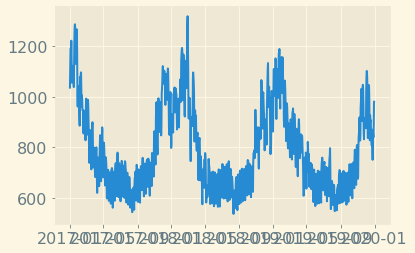

In [43]:
# You *can* use pandas series as the x and y arrays for
# a matplotlib plot.
plt.plot(df.index,df["France"])
# Here, df.index is the column of dates, the x axis
#       df["France"] is the the y axis

Text(0, 0.5, 'W per capita')

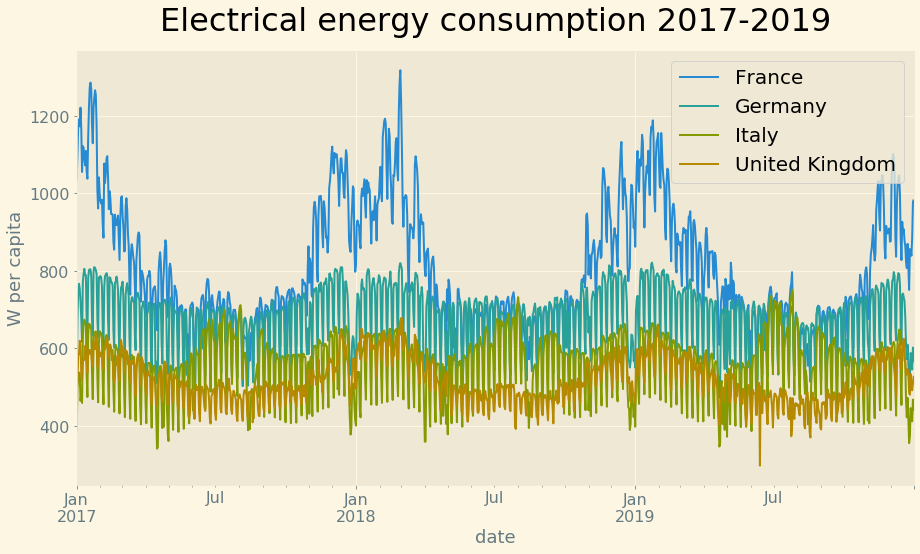

In [42]:
ax = df.plot(figsize=(15,8)) # uses plt.plot behind the scenes
ax.set_title("Electrical energy consumption 2017-2019",pad=20)
ax.set_ylabel("W per capita")

Text(0, 0.5, 'W per capita')

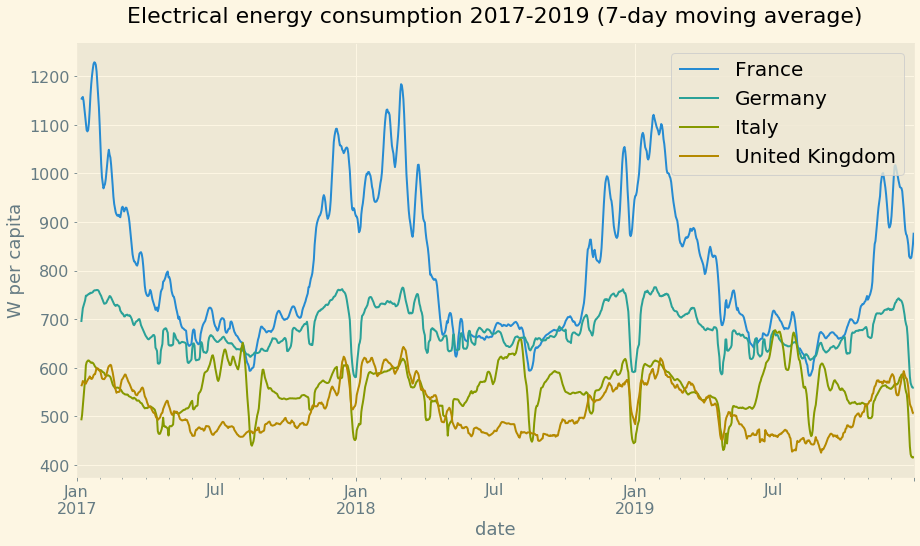

In [41]:
ax = df.rolling(7).mean().plot(figsize=(15,8)) # uses plt.plot behind the scenes
ax.set_title("Electrical energy consumption 2017-2019 (7-day moving average)",size=22,pad=20)
ax.set_ylabel("W per capita")